# Data Mining Homework 3
## Question 7
### Mohammad Bahrami - 9724133

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading

In [75]:
iris_df = pd.read_csv('Iris.csv', index_col=0)
popfailure_df = pd.read_csv('pop_failures.csv', index_col=0)
banknote_df = pd.read_csv('banknote_authntication.csv', index_col=0)
creditcard_df = pd.read_csv('credit cards.csv')

### Normalization

In [76]:
from sklearn.preprocessing import StandardScaler
iris_df.loc[:, iris_df.columns != 'Class'] = StandardScaler().fit_transform(iris_df.loc[:, iris_df.columns != 'Class'])
popfailure_df.loc[:, popfailure_df.columns != 'outcome'] = StandardScaler().fit_transform(popfailure_df.loc[:, popfailure_df.columns != 'outcome'])
banknote_df.loc[:, banknote_df.columns != 'label'] = StandardScaler().fit_transform(banknote_df.loc[:, banknote_df.columns != 'label'])
creditcard_df.loc[:, creditcard_df.columns != 'default'] = StandardScaler().fit_transform(creditcard_df.loc[:, creditcard_df.columns != 'default'])

### Part a

In [77]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(iris_df, test_size=0.2)
X_train = train_df.loc[:, train_df.columns != 'Class']
Y_train = train_df['Class']
X_test = test_df.loc[:, test_df.columns != 'Class']
Y_test = test_df['Class']

In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

kdtree_accuracies = []
kdtree_errors = []
verbose=0
for k in range(1, 31):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree').fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)
    error = 1 - accuracy
    kdtree_accuracies.append(accuracy)
    kdtree_errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
kdtree_accuracies = np.array(kdtree_accuracies)
kdtree_errors = np.array(kdtree_errors)

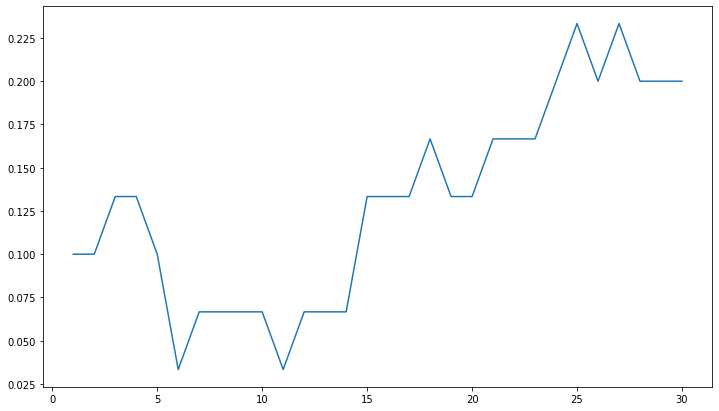

In [79]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    kdtree_errors
)
fig.set_size_inches((12, 7))

After a large enough k, the model starts to ignore local properties and doesn't generalize well on the test set.

In [80]:
print(f'First Best Error: {kdtree_errors.min()} at K: {kdtree_errors.argmin() + 1}')

First Best Error: 0.033333333333333326 at K: 6


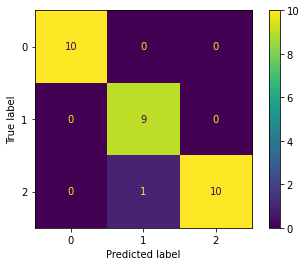

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_classifier = KNeighborsClassifier(n_neighbors=kdtree_errors.argmin()+1, algorithm='kd_tree').fit(X_train, Y_train)
cm = confusion_matrix(Y_test, best_classifier.predict(X_test))
ConfusionMatrixDisplay(cm).plot()


The model has made only one mistake in the test set and predicted a true class of 2 to be class 1.

### Part b

In [82]:
from sklearn.neighbors import KNeighborsClassifier
balltree_accuracies = []
balltree_errors = []
verbose=0
for k in range(1, 31):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree').fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)
    error = 1 - accuracy
    balltree_accuracies.append(accuracy)
    balltree_errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
balltree_accuracies = np.array(balltree_accuracies)
balltree_errors = np.array(balltree_errors)

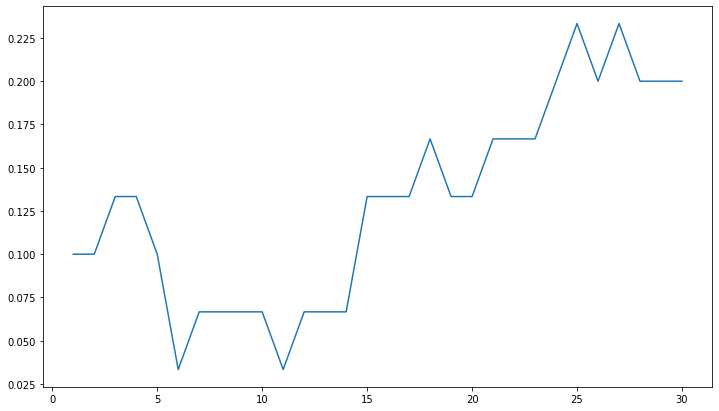

In [83]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    balltree_errors,
)
fig.set_size_inches((12, 7))

After a large enough k, the model starts to ignore local properties and doesn't generalize well on the test set. we can see that both models have similar performances.

In [84]:
print(f'First Best Error: {balltree_errors.min()} at K: {balltree_errors.argmin() + 1}')

First Best Error: 0.033333333333333326 at K: 6


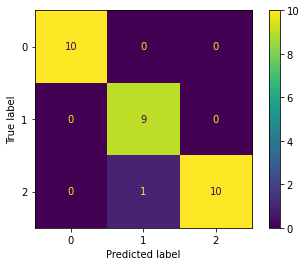

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_classifier = KNeighborsClassifier(n_neighbors=balltree_errors.argmin()+1, algorithm='ball_tree').fit(X_train, Y_train)
cm = confusion_matrix(Y_test, best_classifier.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

I see the exact same results.

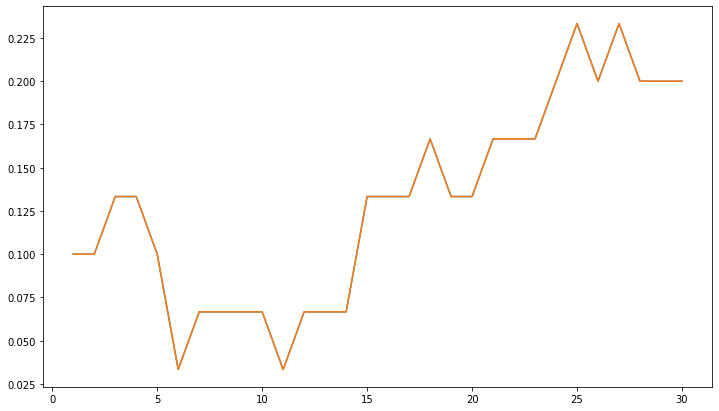

In [86]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    kdtree_errors,
    label = 'KDTree'
)
ax.plot(
    np.arange(1, 31),
    balltree_errors,
    label = 'BallTree'
)
fig.set_size_inches((12, 7))

The plots are overlaying each other in every K value. this means for this particular problem, KDTree and Balltree have the same performance and results.

### Part c

#### Part c_a

In [95]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(popfailure_df, test_size=0.2)
X_train = train_df.loc[:, train_df.columns != 'outcome']
Y_train = train_df['outcome']
X_test = test_df.loc[:, test_df.columns != 'outcome']
Y_test = test_df['outcome']

In [96]:
from sklearn.neighbors import KNeighborsClassifier

kdtree_accuracies = []
kdtree_errors = []
verbose=0
for k in range(1, 31):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree').fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)
    error = 1 - accuracy
    kdtree_accuracies.append(accuracy)
    kdtree_errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
kdtree_accuracies = np.array(kdtree_accuracies)
kdtree_errors = np.array(kdtree_errors)

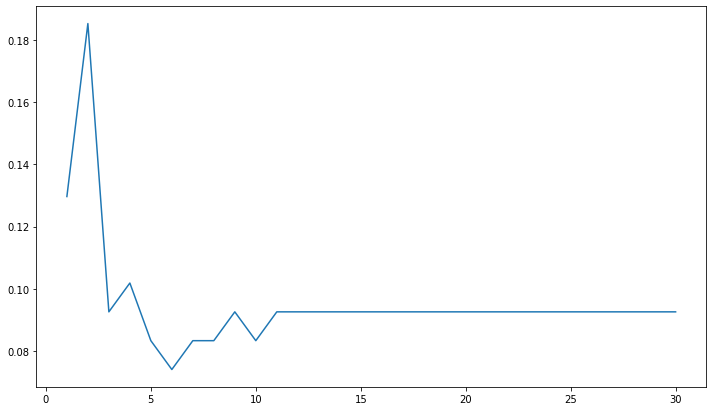

In [97]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    kdtree_errors
)
fig.set_size_inches((12, 7))

After a large enough k, the model starts to ignore local properties and doesn't generalize well on the test set.

In [98]:
print(f'First Best Error: {kdtree_errors.min()} at K: {kdtree_errors.argmin() + 1}')

First Best Error: 0.07407407407407407 at K: 6


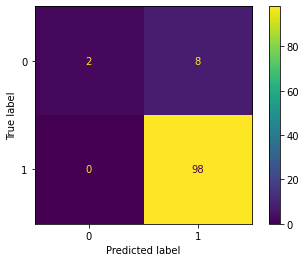

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_classifier = KNeighborsClassifier(n_neighbors=kdtree_errors.argmin()+1, algorithm='kd_tree').fit(X_train, Y_train)
cm = confusion_matrix(Y_test, best_classifier.predict(X_test))
ConfusionMatrixDisplay(cm).plot()


The model has made only one mistake in the test set and predicted a true class of 2 to be class 1.

#### Part c_b

In [100]:
from sklearn.neighbors import KNeighborsClassifier
balltree_accuracies = []
balltree_errors = []
verbose=0
for k in range(1, 31):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree').fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)
    error = 1 - accuracy
    balltree_accuracies.append(accuracy)
    balltree_errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
balltree_accuracies = np.array(balltree_accuracies)
balltree_errors = np.array(balltree_errors)

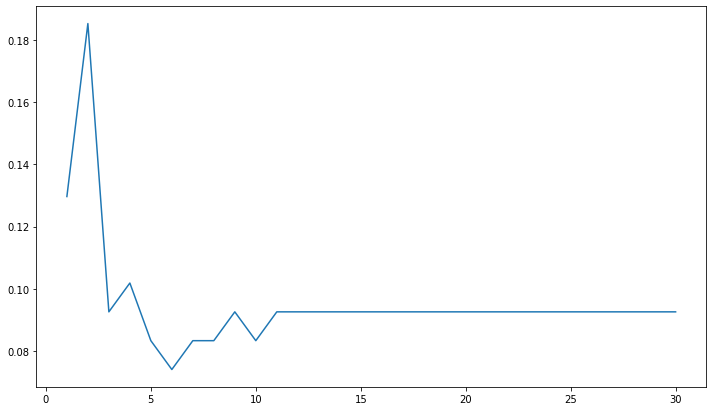

In [101]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    balltree_errors,
)
fig.set_size_inches((12, 7))

After a large enough k, the model starts to ignore local properties and doesn't generalize well on the test set. we can see that both models have similar performances.

In [102]:
print(f'First Best Error: {balltree_errors.min()} at K: {balltree_errors.argmin() + 1}')

First Best Error: 0.07407407407407407 at K: 6


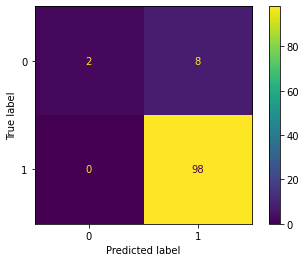

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_classifier = KNeighborsClassifier(n_neighbors=balltree_errors.argmin()+1, algorithm='ball_tree').fit(X_train, Y_train)
cm = confusion_matrix(Y_test, best_classifier.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

I see the exact same results.

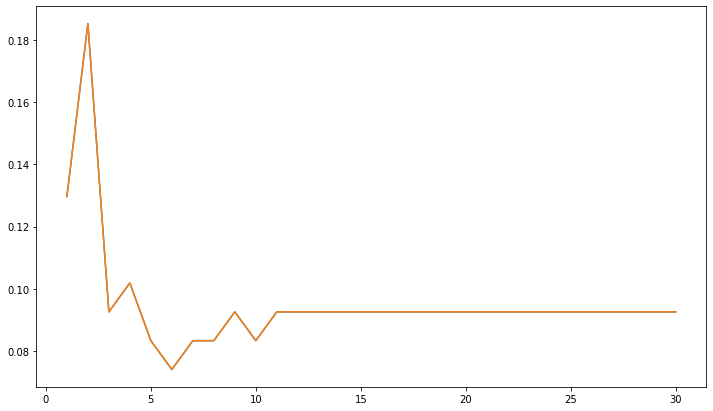

In [104]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    kdtree_errors,
    label = 'KDTree'
)
ax.plot(
    np.arange(1, 31),
    balltree_errors,
    label = 'BallTree'
)
fig.set_size_inches((12, 7))

The plots are overlaying each other in every K value. this means for this particular problem, KDTree and Balltree have the same performance and results as it was for the Iris Problem.

### Part d

#### Part d_a

In [107]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(banknote_df, test_size=0.2)
X_train = train_df.loc[:, train_df.columns != 'label']
Y_train = train_df['label']
X_test = test_df.loc[:, test_df.columns != 'label']
Y_test = test_df['label']

In [108]:
from sklearn.neighbors import KNeighborsClassifier

kdtree_accuracies = []
kdtree_errors = []
verbose=0
for k in range(1, 31):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree').fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)
    error = 1 - accuracy
    kdtree_accuracies.append(accuracy)
    kdtree_errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
kdtree_accuracies = np.array(kdtree_accuracies)
kdtree_errors = np.array(kdtree_errors)

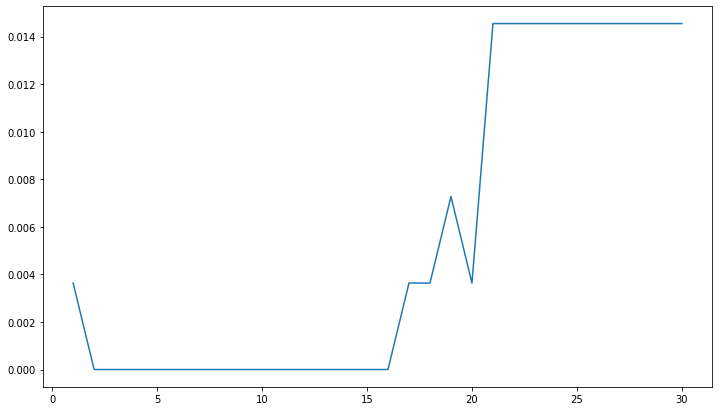

In [109]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    kdtree_errors
)
fig.set_size_inches((12, 7))

After a large enough k, the model starts to ignore local properties and doesn't generalize well on the test set.

In [110]:
print(f'First Best Error: {kdtree_errors.min()} at K: {kdtree_errors.argmin() + 1}')

First Best Error: 0.0 at K: 2


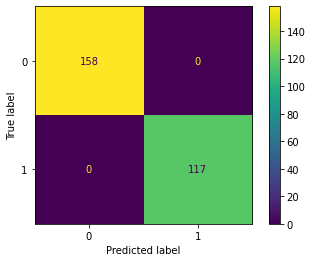

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_classifier = KNeighborsClassifier(n_neighbors=kdtree_errors.argmin()+1, algorithm='kd_tree').fit(X_train, Y_train)
cm = confusion_matrix(Y_test, best_classifier.predict(X_test))
ConfusionMatrixDisplay(cm).plot()


The model has made only one mistake in the test set and predicted a true class of 2 to be class 1.

#### Part d_b

In [112]:
from sklearn.neighbors import KNeighborsClassifier
balltree_accuracies = []
balltree_errors = []
verbose=0
for k in range(1, 31):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree').fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)
    error = 1 - accuracy
    balltree_accuracies.append(accuracy)
    balltree_errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
balltree_accuracies = np.array(balltree_accuracies)
balltree_errors = np.array(balltree_errors)

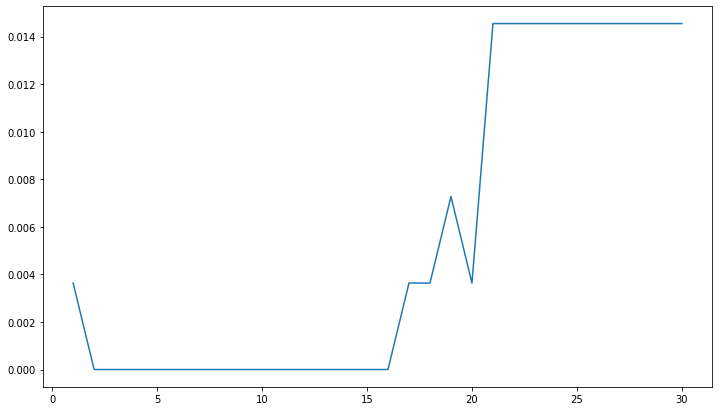

In [113]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    balltree_errors,
)
fig.set_size_inches((12, 7))

After a large enough k, the model starts to ignore local properties and doesn't generalize well on the test set. we can see that both models have similar performances.

In [114]:
print(f'First Best Error: {balltree_errors.min()} at K: {balltree_errors.argmin() + 1}')

First Best Error: 0.0 at K: 2


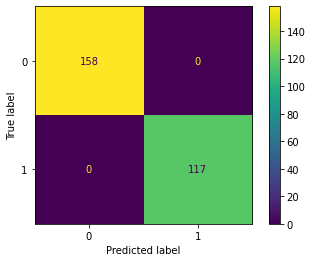

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_classifier = KNeighborsClassifier(n_neighbors=balltree_errors.argmin()+1, algorithm='ball_tree').fit(X_train, Y_train)
cm = confusion_matrix(Y_test, best_classifier.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

I see the exact same results.

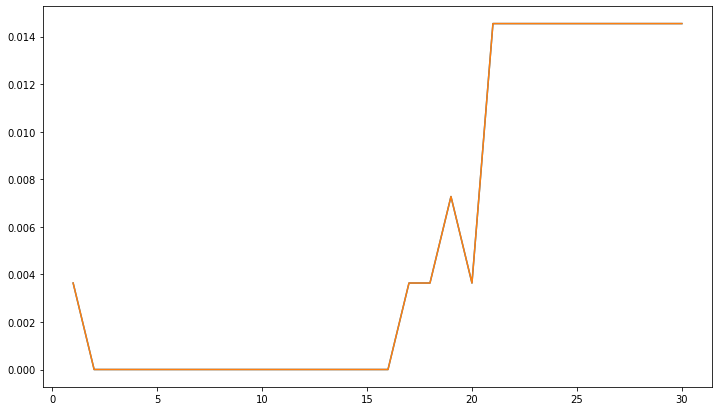

In [116]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    kdtree_errors,
    label = 'KDTree'
)
ax.plot(
    np.arange(1, 31),
    balltree_errors,
    label = 'BallTree'
)
fig.set_size_inches((12, 7))

The plots are overlaying each other in every K value. this means for this particular problem, KDTree and Balltree have the same performance and results as it was for the Iris and the Pop Failure Problems.

### Part e

#### Part e_a

In [118]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(creditcard_df, test_size=0.2)
X_train = train_df.loc[:, train_df.columns != 'default']
Y_train = train_df['default']
X_test = test_df.loc[:, test_df.columns != 'default']
Y_test = test_df['default']

In [119]:
from sklearn.neighbors import KNeighborsClassifier

kdtree_accuracies = []
kdtree_errors = []
verbose=0
for k in range(1, 31):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree').fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)
    error = 1 - accuracy
    kdtree_accuracies.append(accuracy)
    kdtree_errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
kdtree_accuracies = np.array(kdtree_accuracies)
kdtree_errors = np.array(kdtree_errors)

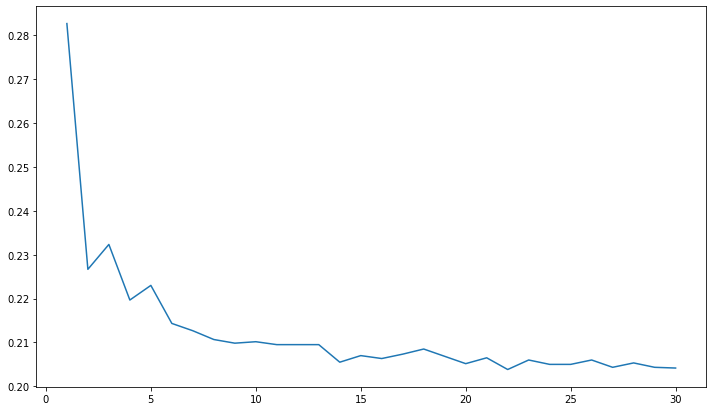

In [120]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    kdtree_errors
)
fig.set_size_inches((12, 7))

As we can see, in a larger dataset like the one we are working on right now, it is safer to increase the `K` without loosing the model performance

In [121]:
print(f'First Best Error: {kdtree_errors.min()} at K: {kdtree_errors.argmin() + 1}')

First Best Error: 0.2038333333333333 at K: 22


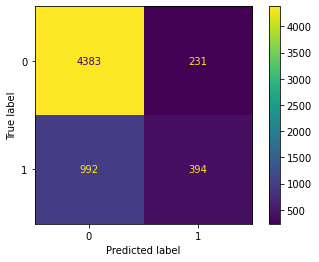

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_classifier = KNeighborsClassifier(n_neighbors=kdtree_errors.argmin()+1, algorithm='kd_tree').fit(X_train, Y_train)
cm = confusion_matrix(Y_test, best_classifier.predict(X_test))
ConfusionMatrixDisplay(cm).plot()


The model has many mistakes where the label is 1. The model predicts to output to be 0 in these points.

#### Part c_b

In [123]:
from sklearn.neighbors import KNeighborsClassifier
balltree_accuracies = []
balltree_errors = []
verbose=0
for k in range(1, 31):
    classifier = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree').fit(X_train, Y_train)
    accuracy = classifier.score(X_test, Y_test)
    error = 1 - accuracy
    balltree_accuracies.append(accuracy)
    balltree_errors.append(error)
    if verbose:
        print(f'KNNClassifier Accuracy with K={k}: {accuracy*100: .2f}%')
balltree_accuracies = np.array(balltree_accuracies)
balltree_errors = np.array(balltree_errors)

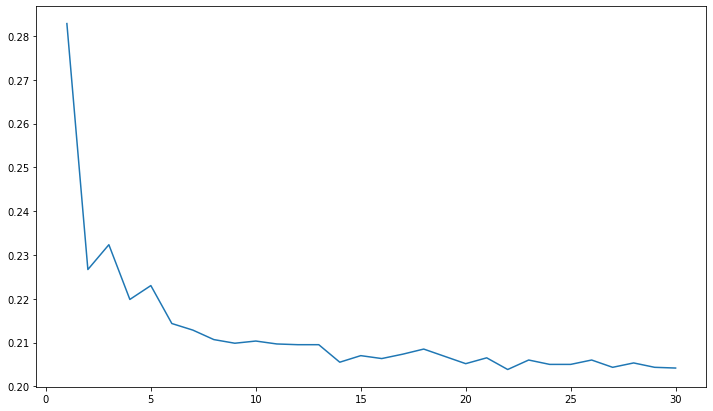

In [124]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    balltree_errors,
)
fig.set_size_inches((12, 7))

As we can see, in a larger dataset like the one we are working on right now, it is safer to increase the `K` without loosing the model performance

In [125]:
print(f'First Best Error: {balltree_errors.min()} at K: {balltree_errors.argmin() + 1}')

First Best Error: 0.2038333333333333 at K: 22


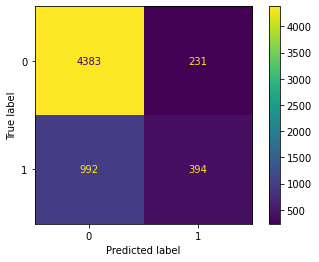

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_classifier = KNeighborsClassifier(n_neighbors=balltree_errors.argmin()+1, algorithm='ball_tree').fit(X_train, Y_train)
cm = confusion_matrix(Y_test, best_classifier.predict(X_test))
ConfusionMatrixDisplay(cm).plot()

I see the exact same results.

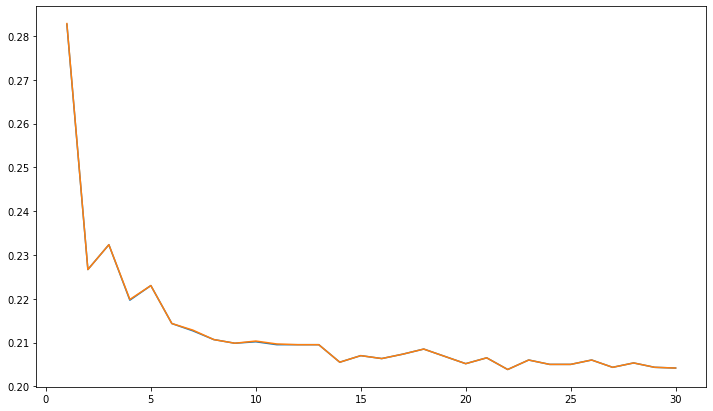

In [127]:
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 31),
    kdtree_errors,
    label = 'KDTree'
)
ax.plot(
    np.arange(1, 31),
    balltree_errors,
    label = 'BallTree'
)
fig.set_size_inches((12, 7))

The plots are overlaying each other in every K value. this means for this particular problem, KDTree and Balltree have the same performance and results as it was for the Iris, The Pop Failure and the Banknote Problems.

### Part f

In terms of results and accuracy, both algorithms performed similarly on every dataset. For the performance and time complexity, the KDTree algorithm might be the better choice. Whereas for a high-dimensional dataset, the BallTree Algorithm performs better in terms of time complexity w.r.t. sample count and feature space.